In [7]:
import numpy as np
import sklearn
import sklearn.datasets as ds
import sklearn.cross_validation as cv
import sklearn.neighbors as nb
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
# 手書き文字のデータセット 8 * 8 = 64ピクセルで0~16の値をとる
digits = ds.load_digits() 
X = digits.data
y = digits.target
print((X.min(), X.max()))
print(X.shape)

(0.0, 16.0)
(1797, 64)


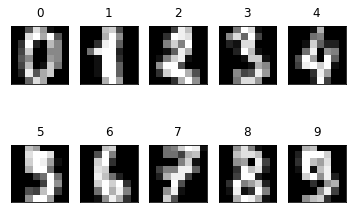

In [9]:
# 学習データを表示
nrows, ncols = 2, 5
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i+1)
    ax.matshow(digits.images[i,...])
    plt.xticks([])
    plt.yticks([])
    plt.title(digits.target[i]) 

In [10]:
(X_train, X_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.25)
knc = nb.KNeighborsClassifier()
knc.fit(X_train, y_train) # 学習

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
X_test[1]

array([  0.,   0.,   3.,  13.,   6.,   0.,   0.,   0.,   0.,   0.,  14.,
        11.,  15.,   8.,   0.,   0.,   0.,   0.,  15.,   1.,  14.,  16.,
         1.,   0.,   0.,   0.,  11.,  13.,  12.,  13.,   5.,   0.,   0.,
         0.,   3.,   8.,   1.,   8.,  10.,   0.,   0.,   0.,   0.,   0.,
         0.,   9.,   6.,   0.,   0.,   0.,   9.,   4.,   3.,  16.,   2.,
         0.,   0.,   0.,   4.,  14.,  14.,   7.,   0.,   0.])

In [14]:
knc.score(X_test, y_test) # 学習済み分類きのscore表示

0.97999999999999998

In [15]:
knc.predict(X_test[1].reshape(1, -1)) # 適当なテストデータで分類実行

array([9])

In [16]:
y_test[1]

9

In [17]:
# テストデータを作成して試す
one = np.zeros((8, 8))
one[1:-1, 4] = 16
one

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  16.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  16.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  16.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  16.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  16.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  16.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

Text(0.5,1,'One')

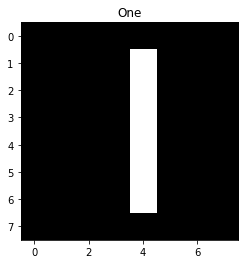

In [18]:
plt.imshow(one, interpolation='none')
plt.grid(False)
plt.xticks()
plt.yticks()
plt.title("One") # テスト用のデータ(1)を表示

In [19]:
knc.predict(one.reshape(1, -1)) # 評価

array([1])